In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stanford-earthquake-dataset-stead/merge.hdf5
/kaggle/input/stanford-earthquake-dataset-stead/merge.csv


In [2]:
meta = pd.read_csv("/kaggle/input/stanford-earthquake-dataset-stead/merge.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (7,11,13,14,15,18,19,20,21,22,24,25,26,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265657 entries, 0 to 1265656
Data columns (total 35 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   network_code                      1265613 non-null  object 
 1   receiver_code                     1265657 non-null  object 
 2   receiver_type                     1265657 non-null  object 
 3   receiver_latitude                 1265657 non-null  float64
 4   receiver_longitude                1265657 non-null  float64
 5   receiver_elevation_m              1265657 non-null  float64
 6   p_arrival_sample                  1030231 non-null  float64
 7   p_status                          1030231 non-null  object 
 8   p_weight                          1030057 non-null  float64
 9   p_travel_sec                      1030231 non-null  float64
 10  s_arrival_sample                  1030231 non-null  float64
 11  s_status                          103

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
meta["coda_end_sample"]=meta["coda_end_sample"].str.replace("[","")
meta["coda_end_sample"]=meta["coda_end_sample"].str.replace("]","")
meta["coda_end_sample"]=meta["coda_end_sample"].str.replace("NaN","")
meta["coda_end_sample"]=meta["coda_end_sample"].str.replace(".","").astype(float)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [ ]:
meta = meta

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Source Magnitude')

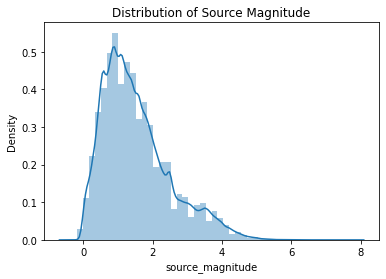

In [5]:
sns.distplot(meta["source_magnitude"])
plt.title("Distribution of Source Magnitude")

In [6]:
meta["source_magnitude"].mean()

1.5260002465466476

In [7]:
meta["source_magnitude"].median()

1.3

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Time (s)')

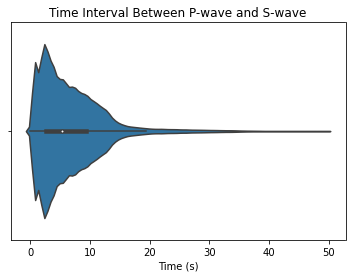

In [28]:
sns.violinplot((meta["s_arrival_sample"]-meta["p_arrival_sample"])/100)
plt.title("Time Interval Between P-wave and S-wave")
plt.xlabel("Time (s)")

In [9]:
((meta["s_arrival_sample"]-meta["p_arrival_sample"])/100).mean()

6.741086618231253

In [10]:
((meta["s_arrival_sample"]-meta["p_arrival_sample"])/100).median()

5.34

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Time (s)')

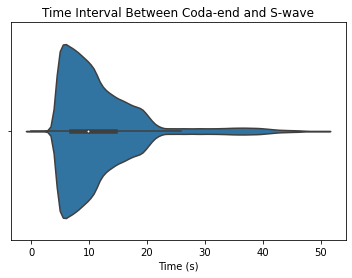

In [29]:
sns.violinplot((meta["coda_end_sample"]-meta["s_arrival_sample"])/100)
plt.title("Time Interval Between Coda-end and S-wave")
plt.xlabel("Time (s)")

In [23]:
((meta["coda_end_sample"]-meta["s_arrival_sample"])/100).mean()

11.822540149033566

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Time (s)')

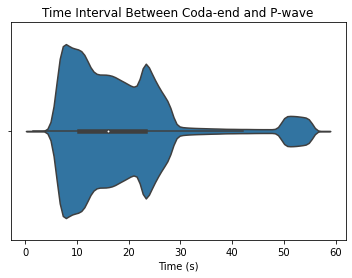

In [30]:
sns.violinplot((meta["coda_end_sample"]-meta["p_arrival_sample"])/100)
plt.title("Time Interval Between Coda-end and P-wave")
plt.xlabel("Time (s)")

In [22]:
((meta["coda_end_sample"]-meta["p_arrival_sample"])/100).mean()

18.563626767264815

In [ ]:
erewr

In [16]:
meta[meta["source_magnitude"]<=0.2]

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,trace_name
235869,TA,A04A,BH,48.7197,-122.7070,23.0,500.0,manual,0.95,15.41,...,UW,None,0.88240,98.04,16.6,[19. 22.5 10.60000038],[[3199.]],2005-02-21 13:12:06.800000,earthquake_local,A04A.TA_20050221131205_EV
236160,TA,A05A,BH,48.9983,-122.0852,174.3,800.0,manual,0.95,4.44,...,UW,None,0.19860,22.06,115.3,[13.30000019 12.39999962 11.39999962],[[2960.]],2007-12-30 01:48:15.000000,earthquake_local,A05A.TA_20071230014814_EV
236185,TA,A05A,BH,48.9983,-122.0852,174.3,500.0,manual,0.95,3.28,...,UW,None,0.13950,15.50,108.4,[13.60000038 19.39999962 21.5 ],[[1980.]],2008-09-05 12:03:44.430000,earthquake_local,A05A.TA_20080905120343_EV
236186,TA,A05A,BH,48.9983,-122.0852,174.3,400.0,manual,0.95,16.33,...,UW,None,0.93120,103.46,335.8,[26.5 30.89999962 24.79999924],[[2458.]],2008-09-11 00:48:15.800000,earthquake_local,A05A.TA_20080911004814_EV
236204,TA,A06A,BH,49.0983,-121.4804,576.0,600.0,manual,0.95,10.96,...,UW,None,0.61720,68.57,34.5,[18.10000038 17.29999924 15.80000019],[[3199.]],2007-10-22 01:28:34.750000,earthquake_local,A06A.TA_20071022012833_EV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265460,WY,YHL,HH,44.8509,-111.1830,2691.0,600.0,manual,0.72,4.04,...,None,None,0.09748,10.83,182.4,[14.69999981 10.69999981 13.69999981],[[1307.]],2016-06-09 02:19:38.750000,earthquake_local,YHL.WY_20160609021937_EV
1265509,WY,YHL,HH,44.8509,-111.1830,2691.0,900.0,manual,0.59,4.66,...,None,None,0.13070,14.53,148.2,[19.89999962 20.20000076 22.70000076],[[2764.]],2016-09-10 11:35:27.380000,earthquake_local,YHL.WY_20160910113526_EV
1265541,WY,YHL,HH,44.8509,-111.1830,2691.0,800.0,manual,0.61,3.81,...,None,None,0.07328,8.14,126.0,[24.79999924 23.89999962 26.10000038],[[1503.]],2016-10-27 05:56:54.910000,earthquake_local,YHL.WY_20161027055653_EV
1265583,WY,YHL,HH,44.8509,-111.1830,2691.0,400.0,manual,0.73,5.35,...,None,None,0.18300,20.35,250.0,[20.60000038 23.5 23.79999924],[[2328.]],2017-05-20 19:35:30.070000,earthquake_local,YHL.WY_20170520193529_EV


In [17]:
meta_2 = meta[meta["source_magnitude"]>=4].reset_index(drop=True)
meta_2["label"] = 2

In [18]:
meta_1 = meta[meta["source_magnitude"]<4].reset_index(drop=True)
meta_1 = meta_1.sample(meta_2.shape[0], random_state=123).reset_index(drop=True)
meta_1["label"] = 1

In [19]:
meta_0 = meta[meta["trace_category"]=='noise']
meta_0 = meta_0.sample(meta_1.shape[0], random_state=123).reset_index(drop=True)
meta_0["label"] = 0

In [20]:
meta_fix = pd.concat([meta_0,meta_1,meta_2]).reset_index(drop=True)
meta_fix = meta_fix.sample(meta_fix.shape[0],random_state = 123).reset_index(drop=True)

In [21]:
trace_name_fix = meta_fix["trace_name"]

In [22]:
import h5py
import numpy as np
import pandas as pd

In [23]:
dataset = h5py.File('/kaggle/input/stanford-earthquake-dataset-stead/merge.hdf5', 'r')

In [24]:
data = dataset['data']

wave = []
for x in trace_name_fix :
    grid = data[x]
    try :
        p_arival = grid.attrs["p_arrival_sample"].astype(int)
    except :
        p_arival = 500
    wave.append(np.array(grid)[p_arival:p_arival+1000])

In [37]:
df = meta_fix
df["wave"] = (wave)
df=df.drop(columns="wave")
df.to_csv("data_fix.csv",index=False)

In [36]:
np.save('wave.npy', wave)

In [38]:
from IPython.display import FileLink
FileLink(r'data_fix.csv')

/kaggle/working/data_fix.csv

In [39]:
from IPython.display import FileLink
FileLink(r'wave.npy')

/kaggle/working/wave.npy

In [44]:
np.load('wave.npy')

array([[[ 1.53949463e+02,  4.72081947e+01,  1.45971024e+02],
        [ 1.60970047e+02,  4.80428352e+01,  1.51877762e+02],
        [ 1.68280182e+02,  4.70946617e+01,  1.59340729e+02],
        ...,
        [-4.16423438e+03, -5.66013367e+02, -4.44327197e+03],
        [-3.60436230e+03, -1.49468909e+03, -4.10207275e+03],
        [-2.97353125e+03, -2.28816333e+03, -3.63845679e+03]],

       [[-1.48099012e+01,  3.99532378e-01, -3.05830116e+01],
        [-3.39514899e+00,  1.35685086e+00, -4.07747192e+01],
        [ 6.72213936e+00,  9.05425072e+00, -6.11383171e+01],
        ...,
        [ 1.44352600e+03,  5.60384094e+02, -1.34370703e+03],
        [ 1.93177075e+03, -4.08721558e+02,  7.84276367e+02],
        [ 9.33077393e+02, -1.24080371e+03,  1.10046387e+03]],

       [[ 5.02900146e+03, -1.15506729e+02, -5.43217578e+03],
        [ 5.19844434e+03, -1.00746704e+02, -5.54871387e+03],
        [ 5.34955957e+03, -8.25397186e+01, -5.63823145e+03],
        ...,
        [-1.90030420e+03,  1.04104258e+04,

In [35]:
pd.read_csv("data_fix.csv")["wave"]

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


0        [[  153.94946     47.208195   145.97102 ]\n [ ...
1        [[-1.4809901e+01  3.9953238e-01 -3.0583012e+01...
2        [[ 5029.0015    -115.50673  -5432.176   ]\n [ ...
3        [[ -6.747195    -0.3862971   -2.6027386 ]\n [-...
4        [[ -25.570293    71.54003      1.1550333]\n [ ...
                               ...                        
71833    [[   54.349888   114.01043    191.74278 ]\n [ ...
71834    [[ 3.4112980e+01 -2.3757418e+01 -3.8668568e+00...
71835    [[-50.800594   42.81572     7.8511276]\n [-29....
71836    [[   4.873723     7.0555453    1.2499276]\n [ ...
71837    [[-499.45795      9.581005   764.26917  ]\n [-...
Name: wave, Length: 71838, dtype: object